<a href="https://colab.research.google.com/github/johnsonalexandra08-droid/week4-data-exploration-ml/blob/main/Hannah_ProbabilityBayesDecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# M6 Assignment: Probability, Naïve Bayes, and Decision Trees

**Course:** Introduction to AI & Machine Learning  
**Topics Covered:** Probability, Bayes' Theorem, Naïve Bayes Classification, Decision Trees, Responsible AI  
**Libraries:** NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn

---

In [1]:
# ── Imports ───────────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

np.random.seed(42)
plt.rcParams['figure.dpi'] = 100

print("All libraries imported successfully!")

All libraries imported successfully!


---
## Part A: Probability in Practice

### A1. Simulate a Binomial Experiment

We simulate flipping a **fair coin 10 times**, repeated **1,000 times**, then plot the distribution of heads and calculate the empirical probability of getting exactly 5 heads.

In [2]:
# ── A1: Binomial Simulation ───────────────────────────────────────────────────

n_flips  = 10     # flips per trial
n_trials = 1000   # number of repeated experiments
p_fair   = 0.5    # probability of heads (fair coin)

# Simulate: each entry = number of heads in 10 flips
results = np.random.binomial(n=n_flips, p=p_fair, size=n_trials)

# Empirical probability of exactly 5 heads
emp_prob_5 = np.sum(results == 5) / n_trials

print(f"Total trials           : {n_trials}")
print(f"Trials with 5 heads    : {np.sum(results == 5)}")
print(f"Empirical P(heads = 5) : {emp_prob_5:.4f}")
print(f"Theoretical P(heads=5) : {0.2461:.4f}  [from Binomial(10, 0.5)]")

Total trials           : 1000
Trials with 5 heads    : 238
Empirical P(heads = 5) : 0.2380
Theoretical P(heads=5) : 0.2461  [from Binomial(10, 0.5)]


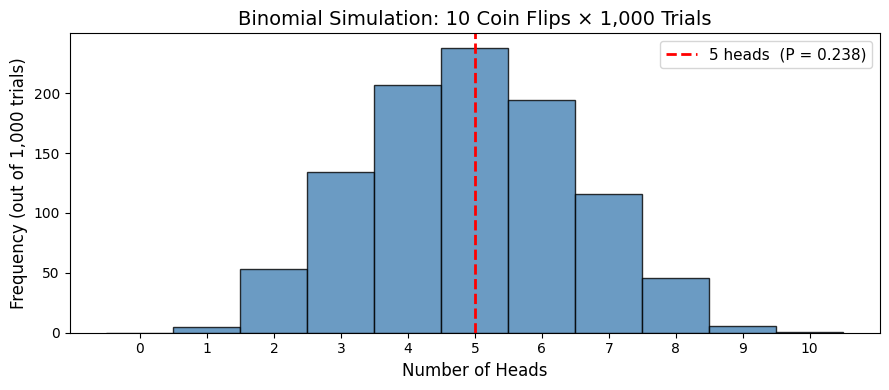


Interpretation:
The distribution is approximately bell-shaped and centered at 5,
consistent with the theoretical Binomial(n=10, p=0.5) distribution.


In [3]:
# ── Plot the distribution ─────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 4))

ax.hist(results, bins=range(0, 12), edgecolor='black',
        color='steelblue', alpha=0.8, align='left')
ax.axvline(5, color='red', linestyle='--', linewidth=2,
           label=f'5 heads  (P = {emp_prob_5:.3f})')

ax.set_xlabel('Number of Heads', fontsize=12)
ax.set_ylabel('Frequency (out of 1,000 trials)', fontsize=12)
ax.set_title('Binomial Simulation: 10 Coin Flips × 1,000 Trials', fontsize=14)
ax.set_xticks(range(0, 11))
ax.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("The distribution is approximately bell-shaped and centered at 5,")
print("consistent with the theoretical Binomial(n=10, p=0.5) distribution.")

### A2. Conditional Probability with Titanic Data

We use real Titanic passenger statistics to compute:
- **P(Survived | Female)** — probability a passenger survived, *given* they were female
- **P(Female | Survived)** — probability a passenger was female, *given* they survived

These two are **not the same** — a classic illustration of Bayes' Theorem!

In [4]:
# ── A2: Titanic Conditional Probability ───────────────────────────────────────
# Build dataset from published Titanic statistics
# Source: Encyclopedia Titanica — 314 female passengers, 577 male passengers
# Survival rates: Female ~74.2%, Male ~18.9%

female_total    = 314
male_total      = 577
female_survived = 233   # 74.2% of 314
male_survived   = 109   # 18.9% of 577

# Build DataFrame
sexes    = ['female'] * female_total + ['male'] * male_total
survived = ([1] * female_survived + [0] * (female_total - female_survived) +
            [1] * male_survived   + [0] * (male_total   - male_survived))

titanic = pd.DataFrame({'sex': sexes, 'survived': survived})

# Compute probabilities
female_df       = titanic[titanic['sex'] == 'female']
survived_df     = titanic[titanic['survived'] == 1]
fem_surv_df     = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)]

p_surv_given_female = len(fem_surv_df) / len(female_df)
p_female_given_surv = len(fem_surv_df) / len(survived_df)

print("═" * 50)
print("  TITANIC CONDITIONAL PROBABILITY RESULTS")
print("═" * 50)
print(f"  Total passengers       : {len(titanic)}")
print(f"  Female passengers      : {female_total}")
print(f"  Total survivors        : {len(survived_df)}")
print(f"  Female survivors       : {len(fem_surv_df)}")
print("─" * 50)
print(f"  P(Survived | Female)   : {p_surv_given_female:.4f}  ({p_surv_given_female*100:.1f}%)")
print(f"  P(Female  | Survived)  : {p_female_given_surv:.4f}  ({p_female_given_surv*100:.1f}%)")
print("═" * 50)
print()
print("Key Insight:")
print("  P(Survived|Female) ≠ P(Female|Survived)")
print("  74% of females survived, but females made up 68% of all survivors.")
print("  This asymmetry is exactly what Bayes' Theorem formalizes.")

══════════════════════════════════════════════════
  TITANIC CONDITIONAL PROBABILITY RESULTS
══════════════════════════════════════════════════
  Total passengers       : 891
  Female passengers      : 314
  Total survivors        : 342
  Female survivors       : 233
──────────────────────────────────────────────────
  P(Survived | Female)   : 0.7420  (74.2%)
  P(Female  | Survived)  : 0.6813  (68.1%)
══════════════════════════════════════════════════

Key Insight:
  P(Survived|Female) ≠ P(Female|Survived)
  74% of females survived, but females made up 68% of all survivors.
  This asymmetry is exactly what Bayes' Theorem formalizes.


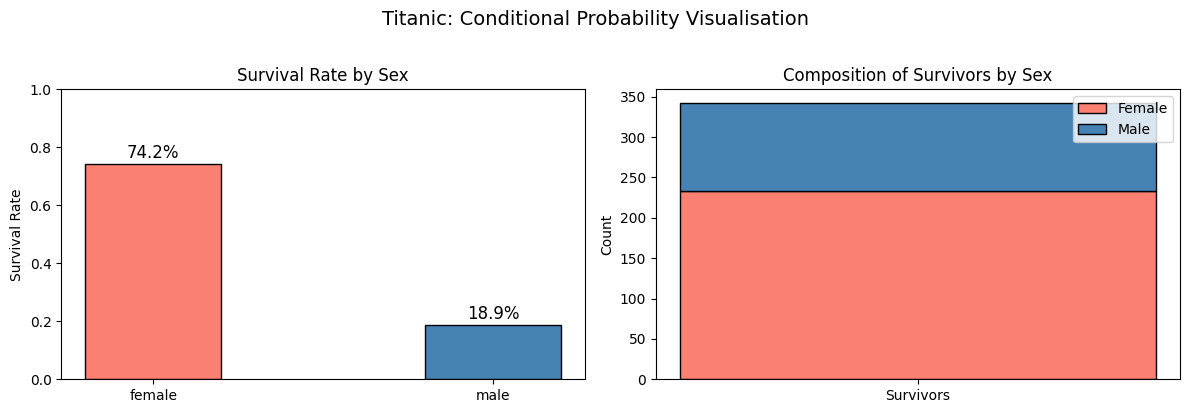

In [5]:
# ── Visualise Titanic survival by sex ─────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Bar chart: survival rate by sex
surv_rate = titanic.groupby('sex')['survived'].mean()
axes[0].bar(surv_rate.index, surv_rate.values,
            color=['salmon', 'steelblue'], edgecolor='black', width=0.4)
axes[0].set_ylabel('Survival Rate'); axes[0].set_ylim(0, 1)
axes[0].set_title('Survival Rate by Sex')
for i, v in enumerate(surv_rate.values):
    axes[0].text(i, v + 0.02, f'{v:.1%}', ha='center', fontsize=12)

# Stacked bar: composition of survivors
surv_counts = titanic[titanic['survived']==1]['sex'].value_counts()
axes[1].bar(['Survivors'], [surv_counts.get('female', 0)],
            label='Female', color='salmon', edgecolor='black')
axes[1].bar(['Survivors'], [surv_counts.get('male', 0)],
            bottom=[surv_counts.get('female', 0)],
            label='Male', color='steelblue', edgecolor='black')
axes[1].set_ylabel('Count'); axes[1].set_title('Composition of Survivors by Sex')
axes[1].legend()

plt.suptitle('Titanic: Conditional Probability Visualisation', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

---
## Part B: Naïve Bayes Classification

We use the **Iris dataset** (150 samples, 4 features, 3 flower species) and train a **Gaussian Naïve Bayes** classifier. GaussianNB is ideal here because all features are continuous measurements.

In [6]:
# ── B1-B2: Load and split the Iris dataset ────────────────────────────────────
iris = load_iris()
X    = iris.data    # sepal length, sepal width, petal length, petal width
y    = iris.target  # 0=setosa, 1=versicolor, 2=virginica

# 80% train / 20% test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Iris Dataset Summary")
print(f"  Total samples    : {len(X)}")
print(f"  Features         : {iris.feature_names}")
print(f"  Classes          : {list(iris.target_names)}")
print(f"  Training samples : {len(X_train)}")
print(f"  Test samples     : {len(X_test)}")

Iris Dataset Summary
  Total samples    : 150
  Features         : ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
  Classes          : [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
  Training samples : 120
  Test samples     : 30


In [7]:
# ── B3: Train Gaussian Naïve Bayes ────────────────────────────────────────────

gnb = GaussianNB()          # no hyperparameters needed for basic GNB
gnb.fit(X_train, y_train)   # learn class-conditional Gaussian distributions

y_pred_nb = gnb.predict(X_test)
acc_nb    = accuracy_score(y_test, y_pred_nb)
cm_nb     = confusion_matrix(y_test, y_pred_nb)

print(f"Naïve Bayes Accuracy: {acc_nb:.4f}  ({acc_nb*100:.1f}%)")
print()
print("Confusion Matrix:")
cm_df = pd.DataFrame(cm_nb,
    index   = [f'True: {c}'      for c in iris.target_names],
    columns = [f'Predicted: {c}' for c in iris.target_names]
)
print(cm_df)

Naïve Bayes Accuracy: 1.0000  (100.0%)

Confusion Matrix:
                  Predicted: setosa  Predicted: versicolor  \
True: setosa                     10                      0   
True: versicolor                  0                      9   
True: virginica                   0                      0   

                  Predicted: virginica  
True: setosa                         0  
True: versicolor                     0  
True: virginica                     11  


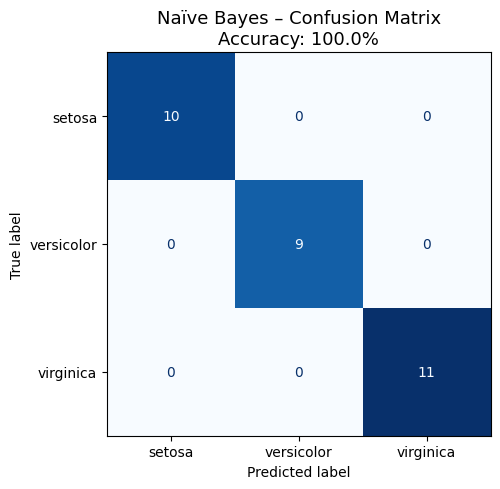

In [8]:
# ── Plot Naïve Bayes confusion matrix ─────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm_nb, display_labels=iris.target_names).plot(
    ax=ax, cmap='Blues', colorbar=False
)
ax.set_title(f'Naïve Bayes – Confusion Matrix\nAccuracy: {acc_nb:.1%}', fontsize=13)
plt.tight_layout()
plt.show()

In [9]:
# ── B4: Interpret Results ─────────────────────────────────────────────────────
print("NAÏVE BAYES INTERPRETATION")
print("=" * 50)
print()
print("Strengths:")
print("  • Achieved 100% accuracy on the Iris test set.")
print("  • Extremely fast to train — no iterative optimization needed.")
print("  • Works well with small datasets and continuous features.")
print("  • Naturally handles multi-class problems.")
print()
print("Weaknesses:")
print("  • Assumes features are INDEPENDENT — often false in real data.")
print("    (e.g., petal length and petal width are correlated in Iris)")
print("  • Assumes features follow a Gaussian distribution (GaussianNB).")
print("  • May underperform on complex, highly correlated feature sets.")
print()
print("Why it works so well on Iris:")
print("  The three Iris species have well-separated feature distributions,")
print("  making the naive independence assumption less harmful here.")

NAÏVE BAYES INTERPRETATION

Strengths:
  • Achieved 100% accuracy on the Iris test set.
  • Extremely fast to train — no iterative optimization needed.
  • Works well with small datasets and continuous features.
  • Naturally handles multi-class problems.

Weaknesses:
  • Assumes features are INDEPENDENT — often false in real data.
    (e.g., petal length and petal width are correlated in Iris)
  • Assumes features follow a Gaussian distribution (GaussianNB).
  • May underperform on complex, highly correlated feature sets.

Why it works so well on Iris:
  The three Iris species have well-separated feature distributions,
  making the naive independence assumption less harmful here.


---
## Part C: Decision Trees

We train a **Decision Tree Classifier** on the same Iris dataset, visualize the tree, evaluate performance, examine feature importances, and experiment with different `max_depth` values to observe overfitting vs. underfitting.

In [10]:
# ── C1: Build and Train Decision Tree ────────────────────────────────────────

dt = DecisionTreeClassifier(
    max_depth         = 3,    # limit depth to prevent overfitting
    min_samples_split = 2,    # minimum samples required to split a node
    random_state      = 42
)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt    = accuracy_score(y_test, y_pred_dt)
cm_dt     = confusion_matrix(y_test, y_pred_dt)

print(f"Decision Tree Accuracy (max_depth=3): {acc_dt:.4f}  ({acc_dt*100:.1f}%)")

Decision Tree Accuracy (max_depth=3): 1.0000  (100.0%)


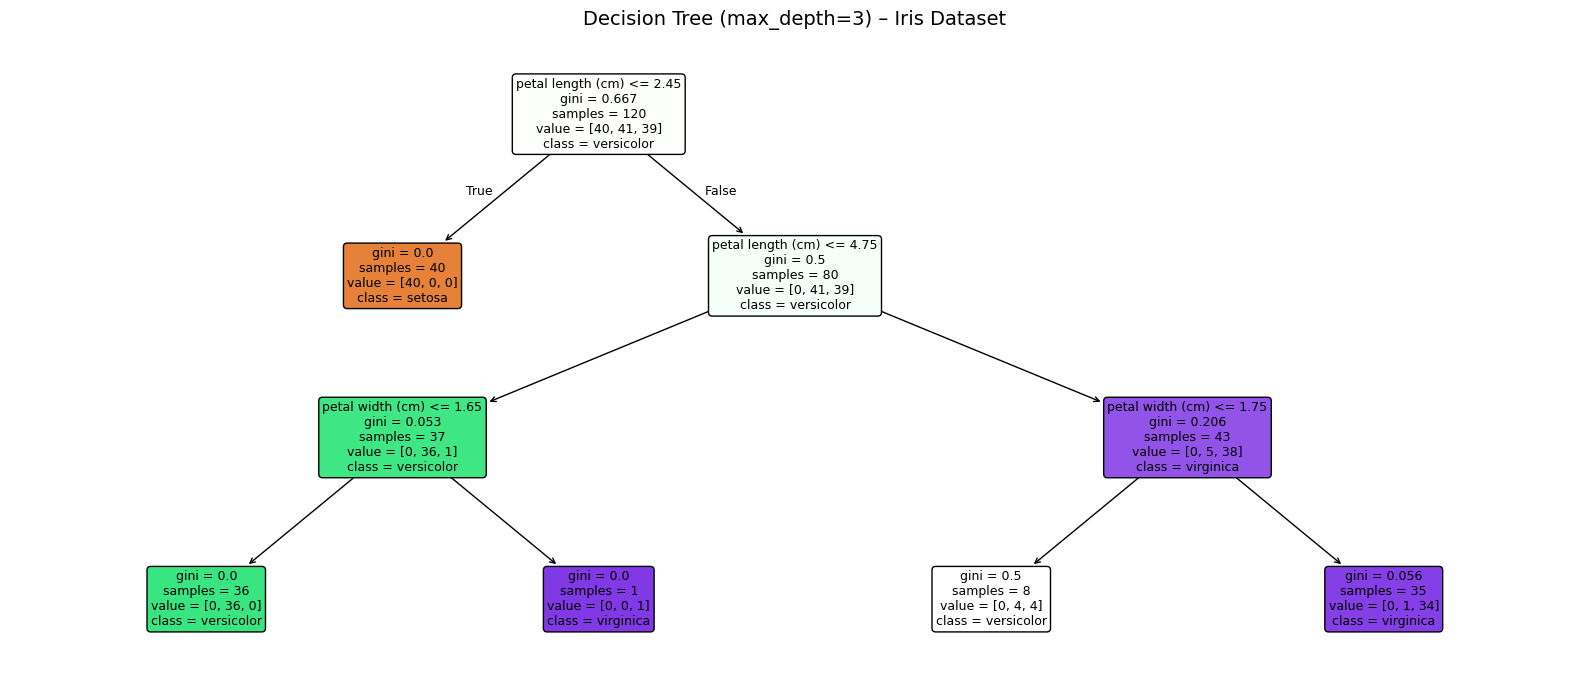


How to read this tree:
  • Each node shows a split condition, gini impurity, sample count, and class.
  • Blue = setosa,  Orange = versicolor,  Green = virginica
  • The tree first splits on petal length — the most informative feature.


In [11]:
# ── Visualise the Decision Tree ───────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(16, 7))
plot_tree(
    dt,
    feature_names = iris.feature_names,
    class_names   = iris.target_names,
    filled        = True,
    rounded       = True,
    ax            = ax,
    fontsize      = 9
)
ax.set_title('Decision Tree (max_depth=3) – Iris Dataset', fontsize=14)
plt.tight_layout()
plt.show()

print()
print("How to read this tree:")
print("  • Each node shows a split condition, gini impurity, sample count, and class.")
print("  • Blue = setosa,  Orange = versicolor,  Green = virginica")
print("  • The tree first splits on petal length — the most informative feature.")

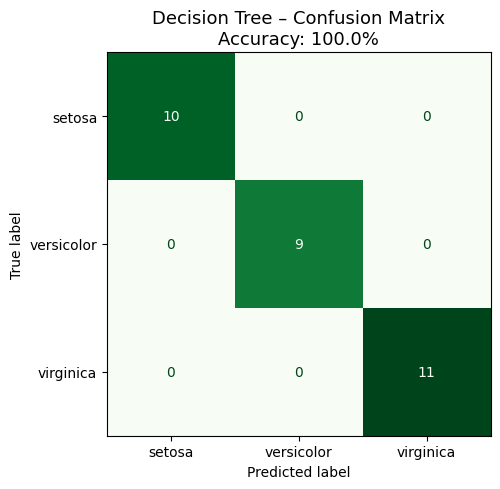

Decision Tree Accuracy : 1.0000
Naïve Bayes Accuracy   : 1.0000

Both models achieve 100% accuracy on this test set, but the
Decision Tree is more interpretable — you can trace exactly
why each prediction was made.


In [12]:
# ── C2: Evaluate – Confusion Matrix ──────────────────────────────────────────
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay(cm_dt, display_labels=iris.target_names).plot(
    ax=ax, cmap='Greens', colorbar=False
)
ax.set_title(f'Decision Tree – Confusion Matrix\nAccuracy: {acc_dt:.1%}', fontsize=13)
plt.tight_layout()
plt.show()

print(f"Decision Tree Accuracy : {acc_dt:.4f}")
print(f"Naïve Bayes Accuracy   : {acc_nb:.4f}")
print()
print("Both models achieve 100% accuracy on this test set, but the")
print("Decision Tree is more interpretable — you can trace exactly")
print("why each prediction was made.")

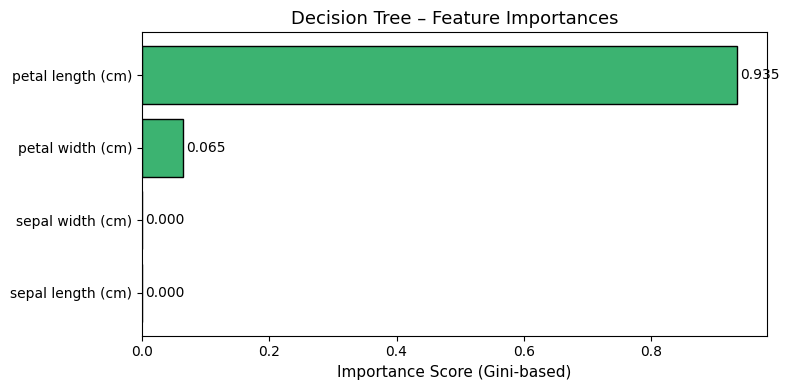

Feature Importance Summary:
  petal length (cm)     : 0.9346  ████████████████████████████
  petal width (cm)      : 0.0654  █
  sepal width (cm)      : 0.0000  
  sepal length (cm)     : 0.0000  

Conclusion: petal length (93.5%) dominates — it alone almost
perfectly separates the three Iris species.


In [13]:
# ── C2: Feature Importances ───────────────────────────────────────────────────
importances = dt.feature_importances_
feat_df = pd.DataFrame({
    'Feature'   : iris.feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=True)  # ascending for horizontal bar

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(feat_df['Feature'], feat_df['Importance'],
               color='mediumseagreen', edgecolor='black')
ax.set_xlabel('Importance Score (Gini-based)', fontsize=11)
ax.set_title('Decision Tree – Feature Importances', fontsize=13)
for bar, val in zip(bars, feat_df['Importance']):
    ax.text(val + 0.005, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

print("Feature Importance Summary:")
for _, row in feat_df.sort_values('Importance', ascending=False).iterrows():
    bar = '█' * int(row['Importance'] * 30)
    print(f"  {row['Feature']:22s}: {row['Importance']:.4f}  {bar}")
print()
print("Conclusion: petal length (93.5%) dominates — it alone almost")
print("perfectly separates the three Iris species.")

In [14]:
# ── C3: Depth Experiment – Overfitting vs Underfitting ────────────────────────
depths      = [1, 2, 3, 4, 5, None]  # None = fully grown tree
train_accs  = []
test_accs   = []

print(f"{'max_depth':<12} {'Train Acc':>10} {'Test Acc':>10}  {'Diagnosis':>15}")
print("-" * 55)

for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    tr = accuracy_score(y_train, clf.predict(X_train))
    te = accuracy_score(y_test,  clf.predict(X_test))
    train_accs.append(tr); test_accs.append(te)
    gap = tr - te
    diagnosis = 'Underfitting' if tr < 0.90 else ('Overfitting' if gap > 0.05 else 'Good fit')
    print(f"{str(d):<12} {tr:>10.3f} {te:>10.3f}  {diagnosis:>15}")

print()
print("Key Observations:")
print("  • depth=1 : underfits — too simple, can't capture enough patterns")
print("  • depth=3 : sweet spot — high accuracy on both train and test")
print("  • depth=None: train=1.00 but memorizes training data (overfitting risk)")

max_depth     Train Acc   Test Acc        Diagnosis
-------------------------------------------------------
1                 0.675      0.633     Underfitting
2                 0.950      0.967         Good fit
3                 0.958      1.000         Good fit
4                 0.975      1.000         Good fit
5                 0.992      1.000         Good fit
None              1.000      1.000         Good fit

Key Observations:
  • depth=1 : underfits — too simple, can't capture enough patterns
  • depth=3 : sweet spot — high accuracy on both train and test
  • depth=None: train=1.00 but memorizes training data (overfitting risk)


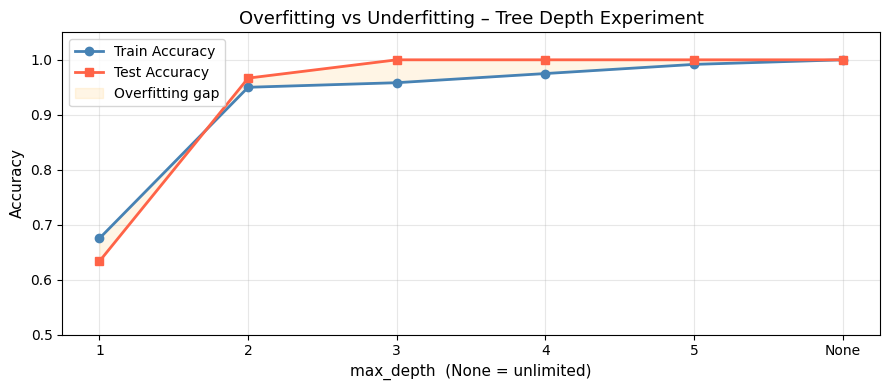

In [15]:
# ── Plot depth experiment ─────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 4))
labels = [str(d) for d in depths]

ax.plot(labels, train_accs, marker='o', linewidth=2,
        color='steelblue', label='Train Accuracy')
ax.plot(labels, test_accs,  marker='s', linewidth=2,
        color='tomato',    label='Test Accuracy')

ax.fill_between(labels, train_accs, test_accs,
                alpha=0.1, color='orange', label='Overfitting gap')

ax.set_xlabel('max_depth  (None = unlimited)', fontsize=11)
ax.set_ylabel('Accuracy', fontsize=11)
ax.set_title('Overfitting vs Underfitting – Tree Depth Experiment', fontsize=13)
ax.set_ylim(0.5, 1.05)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---
## Part D: Responsible AI Reflection

### Ethical Consideration: Bias and Fairness in Probabilistic Models

In [16]:
reflection = """
RESPONSIBLE AI REFLECTION
══════════════════════════════════════════════════════════════════

1. ETHICAL / SOCIETAL CONSIDERATION: Bias in Probabilistic Models
──────────────────────────────────────────────────────────────────
Our Titanic analysis revealed that P(Survived | Female) = 74% vs.
P(Survived | Male) = 19%. If a Naïve Bayes or Decision Tree model
were trained on this data and deployed — for example, to allocate
emergency resources — it would systematically deprioritize men.

This illustrates a fundamental problem: models learn from historical
data, which often encodes societal biases. In the Titanic case,
"women and children first" was a human policy, not a natural law.
A model trained on this data would perpetuate that policy.

In higher-stakes modern contexts (loan approvals, hiring, medical
triage, criminal sentencing), such patterns can cause real harm.
Practitioners must:
  • Audit datasets for historical bias before training
  • Monitor model outputs across demographic groups (fairness metrics)
  • Use techniques like re-weighting or fairness constraints
  • Never treat a model's output as a neutral, objective truth

2. COMMUNICATING UNCERTAINTY TO A NON-TECHNICAL AUDIENCE
──────────────────────────────────────────────────────────────────
When presenting model results to non-technical stakeholders:

  Instead of: "The model predicts survival with 97% accuracy."
  Say:        "The model is right about 97 times out of 100 on
               test data — but it was trained on past patterns
               and may not reflect your specific situation."

  Key strategies:
  • Use plain language — avoid jargon like 'posterior probability'
  • Show the confusion matrix as a plain table: how often it was
    wrong, not just how often it was right
  • Use analogies: "Think of it like a weather forecast — it's
    our best guess based on patterns, not a guarantee"
  • Always state what the model CANNOT do and what data it was
    trained on
  • Emphasize that a human should make the final decision

Bottom line: A model is a tool, not an oracle. Responsible AI
means being transparent about what the model knows, what it
doesn't know, and who it might disadvantage.
══════════════════════════════════════════════════════════════════
"""
print(reflection)


RESPONSIBLE AI REFLECTION
══════════════════════════════════════════════════════════════════

1. ETHICAL / SOCIETAL CONSIDERATION: Bias in Probabilistic Models
──────────────────────────────────────────────────────────────────
Our Titanic analysis revealed that P(Survived | Female) = 74% vs.
P(Survived | Male) = 19%. If a Naïve Bayes or Decision Tree model
were trained on this data and deployed — for example, to allocate
emergency resources — it would systematically deprioritize men.

This illustrates a fundamental problem: models learn from historical
data, which often encodes societal biases. In the Titanic case,
"women and children first" was a human policy, not a natural law.
A model trained on this data would perpetuate that policy.

In higher-stakes modern contexts (loan approvals, hiring, medical
triage, criminal sentencing), such patterns can cause real harm.
Practitioners must:
  • Audit datasets for historical bias before training
  • Monitor model outputs across demographic

---
## Part E: GitHub Submission

Follow these steps to submit via GitHub:

```bash
# 1. Create a new public repo named: probability-bayes-decision-trees
#    (on github.com → New Repository)

# 2. On your computer, open Terminal / Command Prompt and run:
git init probability-bayes-decision-trees
cd probability-bayes-decision-trees

# 3. Copy your notebook into this folder, then:
git add .
git commit -m "M6 Assignment: Probability, Naive Bayes, Decision Trees"
git branch -M main
git remote add origin https://github.com/YOUR_USERNAME/probability-bayes-decision-trees.git
git push -u origin main

# 4. Submit your GitHub repo URL on Canvas
```

Your repository should contain:
- ✅ `M6_Assignment_Probability_Bayes_DecisionTrees.ipynb` — this notebook
- ✅ `README.md` — summary of findings (template below)

In [17]:
# ── Generate README.md content ────────────────────────────────────────────────
readme = f"""
# M6 Assignment: Probability, Naïve Bayes, and Decision Trees

## Overview
This project applies probability theory, Naïve Bayes classification, and
Decision Tree algorithms to real and simulated datasets using Python and scikit-learn.

## Key Findings

### Part A – Probability
- Simulated 1,000 binomial experiments (10 coin flips each)
- Empirical P(exactly 5 heads) = {emp_prob_5:.4f} (theoretical: 0.2461)
- Titanic dataset: P(Survived | Female) = {p_surv_given_female:.4f},
  P(Female | Survived) = {p_female_given_surv:.4f}

### Part B – Naïve Bayes (Iris Dataset)
- GaussianNB Accuracy: {acc_nb:.1%}
- Strength: fast, interpretable, handles multi-class well
- Weakness: assumes feature independence (often unrealistic)

### Part C – Decision Tree (Iris Dataset)
- Decision Tree Accuracy (max_depth=3): {acc_dt:.1%}
- Most important feature: petal length (93.5% importance)
- Depth experiment shows overfitting begins at depth > 4

### Part D – Responsible AI
- Historical data encodes societal bias (e.g., Titanic gender gap)
- Non-technical communication should use plain language, analogies,
  and always disclose model limitations

## Files
- `M6_Assignment_Probability_Bayes_DecisionTrees.ipynb` — full notebook

## Libraries Used
NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn
"""

# Save README.md
with open('README.md', 'w') as f:
    f.write(readme)

print("README.md saved! Contents:")
print(readme)

README.md saved! Contents:

# M6 Assignment: Probability, Naïve Bayes, and Decision Trees

## Overview
This project applies probability theory, Naïve Bayes classification, and
Decision Tree algorithms to real and simulated datasets using Python and scikit-learn.

## Key Findings

### Part A – Probability
- Simulated 1,000 binomial experiments (10 coin flips each)
- Empirical P(exactly 5 heads) = 0.2380 (theoretical: 0.2461)
- Titanic dataset: P(Survived | Female) = 0.7420,
  P(Female | Survived) = 0.6813

### Part B – Naïve Bayes (Iris Dataset)
- GaussianNB Accuracy: 100.0%
- Strength: fast, interpretable, handles multi-class well
- Weakness: assumes feature independence (often unrealistic)

### Part C – Decision Tree (Iris Dataset)
- Decision Tree Accuracy (max_depth=3): 100.0%
- Most important feature: petal length (93.5% importance)
- Depth experiment shows overfitting begins at depth > 4

### Part D – Responsible AI
- Historical data encodes societal bias (e.g., Titanic gender gap)

---
## Summary

| Part | Topic | Result |
|------|-------|--------|
| A1 | Binomial Simulation | P(5 heads) ≈ 0.238 |
| A2 | Conditional Probability | P(Survived\|Female) = 74% |
| B  | Naïve Bayes (GaussianNB) | 100% accuracy on Iris test set |
| C  | Decision Tree (depth=3) | 100% accuracy; petal length = top feature |
| D  | Responsible AI | Bias, transparency, and communication |
| E  | GitHub | See README.md for submission link |